In [1]:
import pandas as pd
import re
from collections import Counter

from google.colab import drive
drive.mount('/gdrive')

file = r'/gdrive/My Drive/AUD_Project_Data.csv'

df = pd.read_csv(file)
df.head()

Mounted at /gdrive


stars_x  useful                                               text  \
0        5       5  Second stop for Center City Restaurant Week:  ...   
1        5       3  I moved from Chicago to Philadelphia over a ye...   
2        5       2  After trying twice unsuccessfully to get there...   
3        5       5  This place is game changer for the neighborhoo...   
4        5       9  Went here for dinner on opening day and was SO...   

                         name  postal_code  review_count  \
0                         R2L        19102           787   
1                     Kanella        19107           579   
2       Octopus Falafel Truck        19103           420   
3          Los Caballos Locos        19148            31   
4  iPho Vietnamese Restaurant        19130           151   

                                          categories  year  month Day_Of_Week  
0  American (New), Lounges, Nightlife, Cocktail B...  2015      9    Thursday  
1  Mediterranean, Food, Greek, Restaurants, Break...  2013      8    Saturday  
2  Food Trucks, Falafel, Food Stands, Food, Medit...  2016     10   Wednesday  
3  Salvadoran, Desserts, Mexican, Restaurants, Fo...  2015      9    Thursday  
4                            Vietnamese, Restaurants  2016      2   Wednesday

In [2]:
# Convert date column
df["date"] = pd.to_datetime(df["year"].astype(str) + "-" + df["month"].astype(str), errors='coerce')

In [3]:
# Define food-related keywords
food_keywords = ["pizza", "burger", "sushi", "pasta", "tacos", "burrito", "steak", "salad", "sandwich",
                 "noodles", "dumplings", "ramen", "pho", "curry", "shawarma", "falafel", "bbq",
                 "lobster", "crab", "shrimp", "oysters", "pancakes", "waffles", "cake", "ice cream",
                 "chocolate", "coffee", "latte", "espresso", "tea", "matcha", "smoothie", "fries", "cheese"]

# Function to extract food trends from text
def extract_food_trends(text):
    return [word for word in food_keywords if re.search(rf'\b{word}\b', str(text).lower())]

In [4]:
# Apply function to extract food trends
df["food_mentions"] = df["text"].dropna().apply(extract_food_trends)

# Expand the list so each food term gets its own row
df_exploded = df.explode("food_mentions").dropna(subset=["food_mentions"])

# Aggregate trends by month
df_trends = df_exploded.groupby(["date", "food_mentions"]).size().reset_index(name="count")

In [5]:
# Split into training (2013-2015) and test (2016)
train = df_trends[(df_trends["date"] >= "2013-01-01") & (df_trends["date"] < "2016-01-01")]
test = df_trends[(df_trends["date"] >= "2016-01-01") & (df_trends["date"] < "2017-01-01")]

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/j5o6m3j1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/2ylulqqk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89514', 'data', 'file=/tmp/tmp5dsp0rk3/j5o6m3j1.json', 'init=/tmp/tmp5dsp0rk3/2ylulqqk.json', 'output', 'file=/tmp/tmp5dsp0rk3/prophet_modelw6ua65j3/prophet_model-20250306002103.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

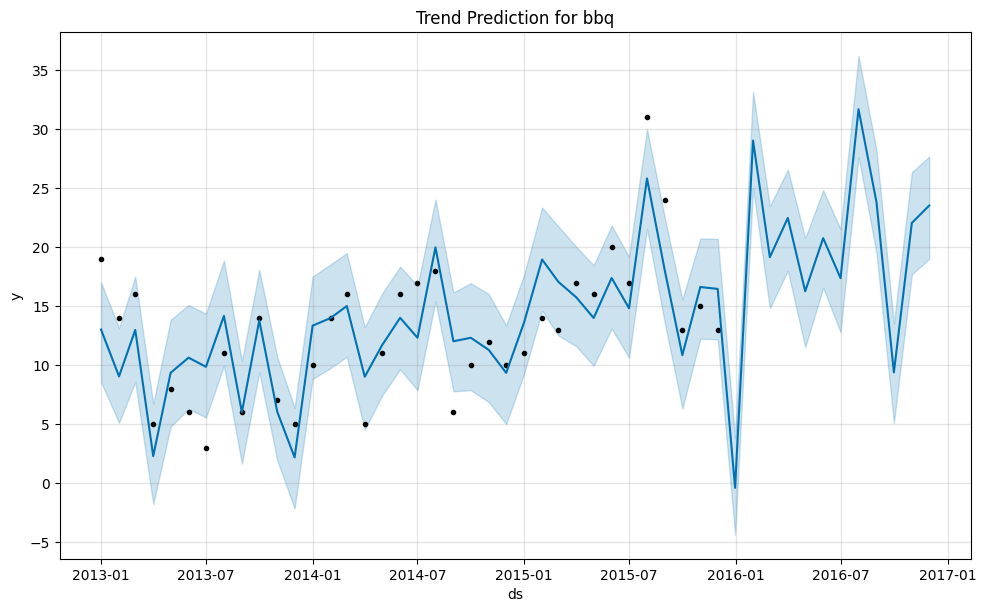

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/q8rs2lfq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/e702p6n_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58658', 'data', 'file=/tmp/tmp5dsp0rk3/q8rs2lfq.json', 'init=/tmp/tmp5dsp0rk3/e702p6n_.json', 'output', 'file=/tmp/tmp5dsp0rk3/prophet_model4ue_b9he/prophet_model-20250306002104.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

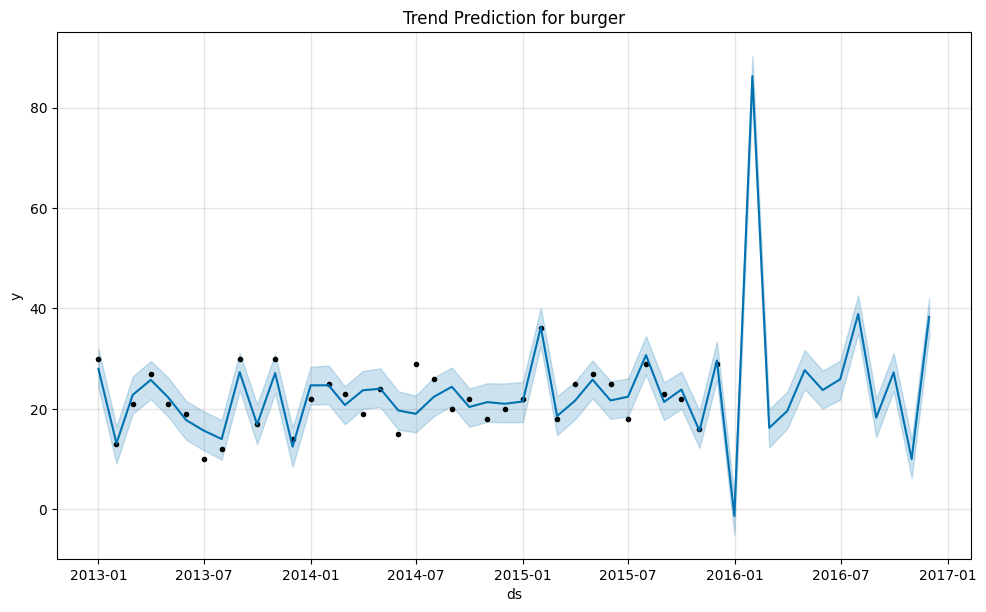

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/9tty_12d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/677_1uge.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89044', 'data', 'file=/tmp/tmp5dsp0rk3/9tty_12d.json', 'init=/tmp/tmp5dsp0rk3/677_1uge.json', 'output', 'file=/tmp/tmp5dsp0rk3/prophet_modelupn0dhg3/prophet_model-20250306002104.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

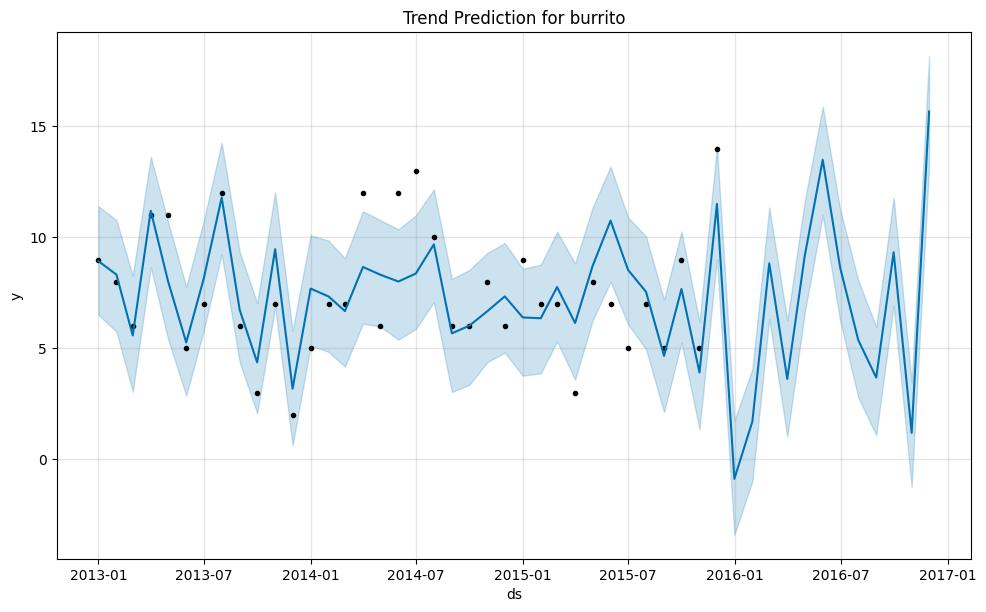

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/73d6sph2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/51c_go1d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91591', 'data', 'file=/tmp/tmp5dsp0rk3/73d6sph2.json', 'init=/tmp/tmp5dsp0rk3/51c_go1d.json', 'output', 'file=/tmp/tmp5dsp0rk3/prophet_modelaxci6nh6/prophet_model-20250306002105.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

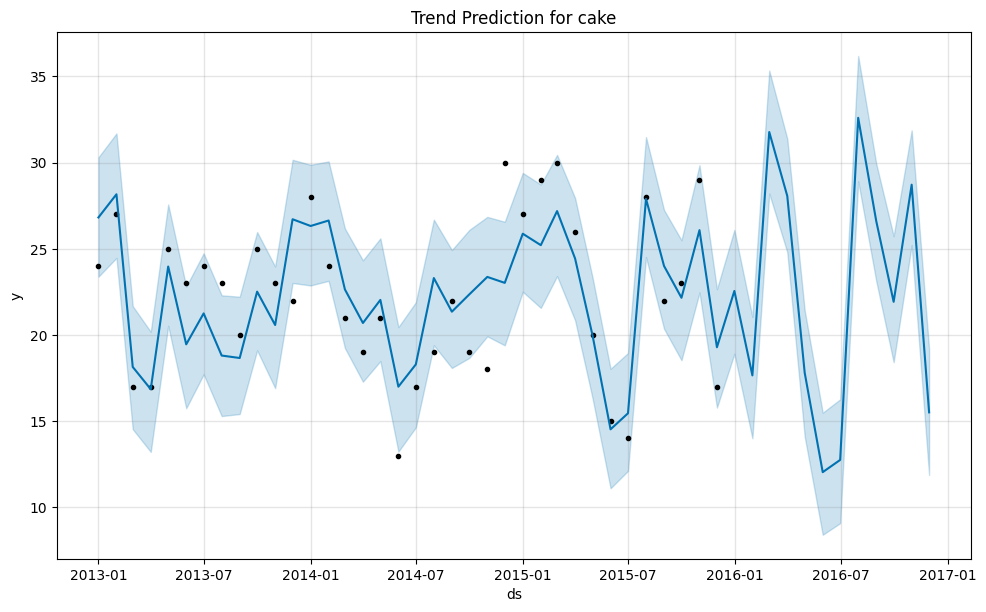

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/0ki94j2n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/3q0611ry.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64678', 'data', 'file=/tmp/tmp5dsp0rk3/0ki94j2n.json', 'init=/tmp/tmp5dsp0rk3/3q0611ry.json', 'output', 'file=/tmp/tmp5dsp0rk3/prophet_modelscbaxdu4/prophet_model-20250306002105.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

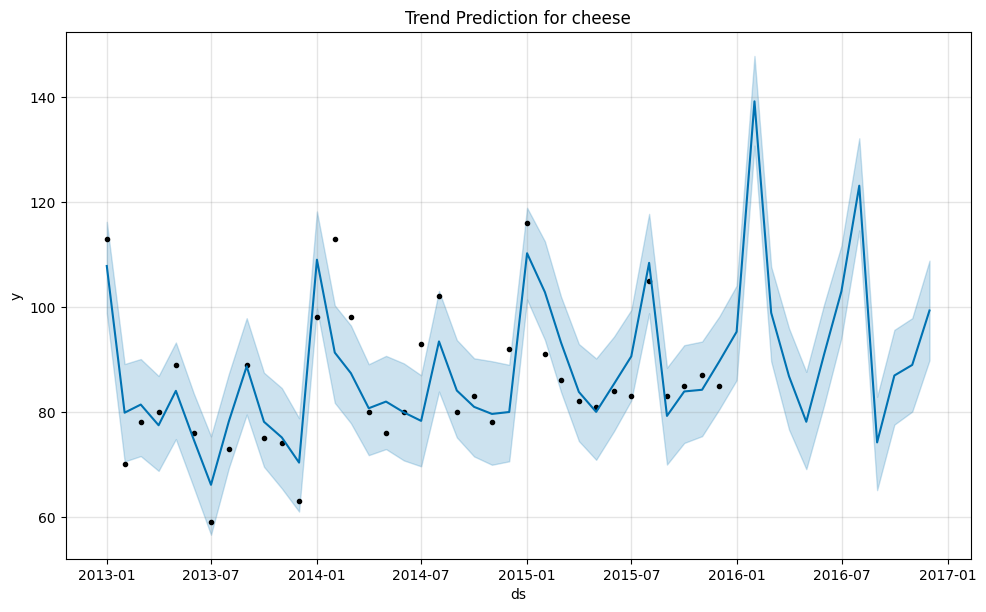

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/8gdwvx4q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/timq4rw5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8420', 'data', 'file=/tmp/tmp5dsp0rk3/8gdwvx4q.json', 'init=/tmp/tmp5dsp0rk3/timq4rw5.json', 'output', 'file=/tmp/tmp5dsp0rk3/prophet_model9lxlaj8q/prophet_model-20250306002106.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/

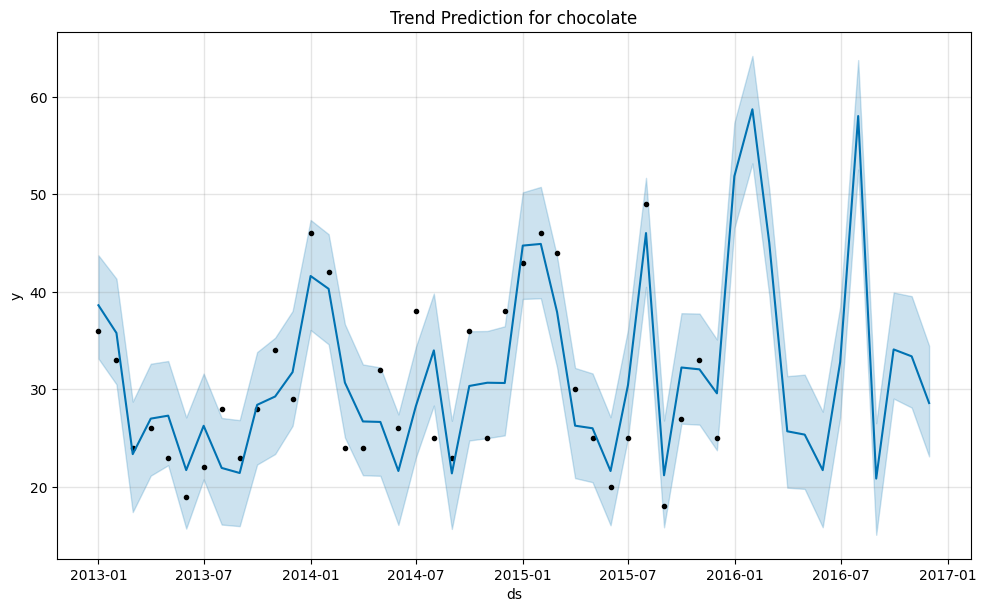

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/2atkzb02.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/b9z1fbst.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31298', 'data', 'file=/tmp/tmp5dsp0rk3/2atkzb02.json', 'init=/tmp/tmp5dsp0rk3/b9z1fbst.json', 'output', 'file=/tmp/tmp5dsp0rk3/prophet_modelhsgqv58b/prophet_model-20250306002107.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

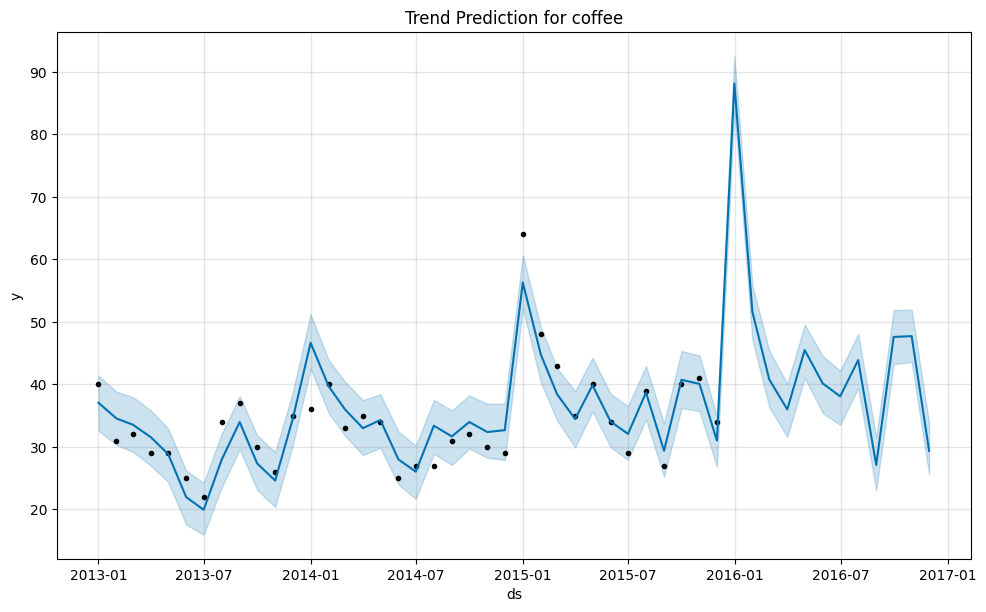

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/3jx9_f2w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/566ozhjn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83467', 'data', 'file=/tmp/tmp5dsp0rk3/3jx9_f2w.json', 'init=/tmp/tmp5dsp0rk3/566ozhjn.json', 'output', 'file=/tmp/tmp5dsp0rk3/prophet_model98auzsus/prophet_model-20250306002107.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

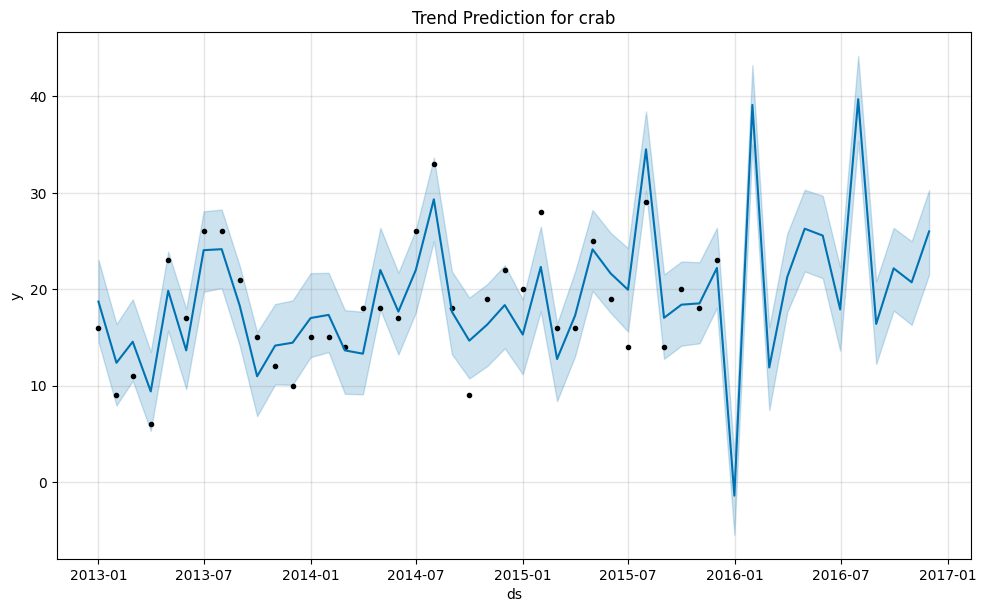

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/yo0k4hgx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/ghmkl_yb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87386', 'data', 'file=/tmp/tmp5dsp0rk3/yo0k4hgx.json', 'init=/tmp/tmp5dsp0rk3/ghmkl_yb.json', 'output', 'file=/tmp/tmp5dsp0rk3/prophet_modelnqqxnm5i/prophet_model-20250306002108.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

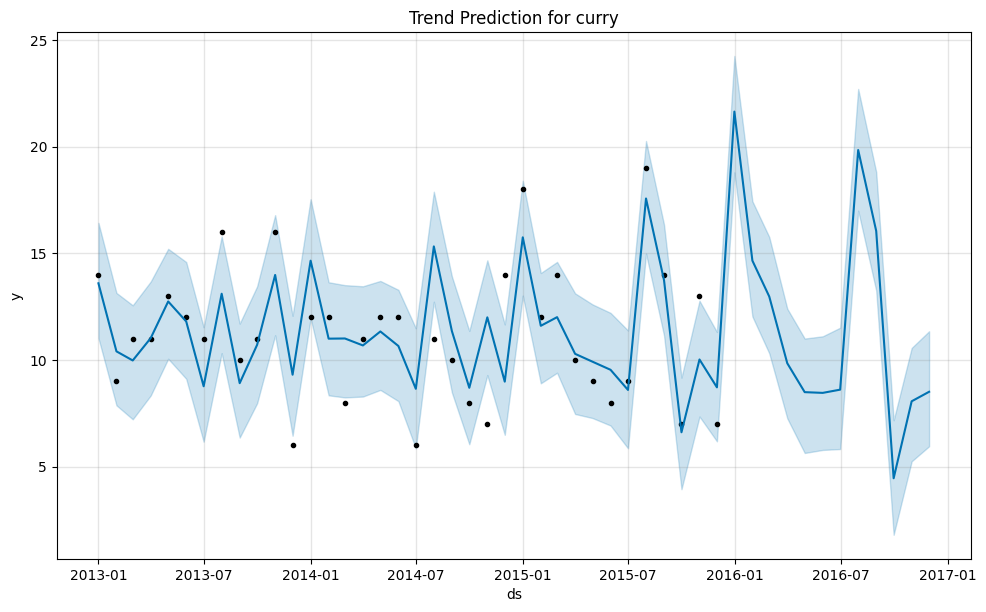

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/ubh2skqt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/mt42abke.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66843', 'data', 'file=/tmp/tmp5dsp0rk3/ubh2skqt.json', 'init=/tmp/tmp5dsp0rk3/mt42abke.json', 'output', 'file=/tmp/tmp5dsp0rk3/prophet_model__fxjm4m/prophet_model-20250306002109.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

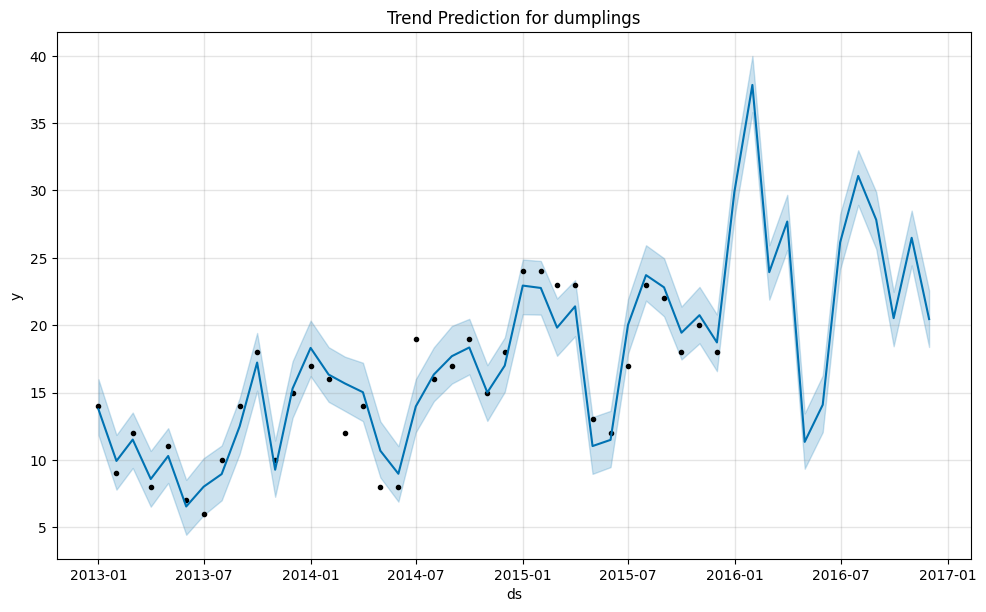

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/bfwr4ydl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/fhhvuewi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=620', 'data', 'file=/tmp/tmp5dsp0rk3/bfwr4ydl.json', 'init=/tmp/tmp5dsp0rk3/fhhvuewi.json', 'output', 'file=/tmp/tmp5dsp0rk3/prophet_modely0ff8jv5/prophet_model-20250306002110.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/p

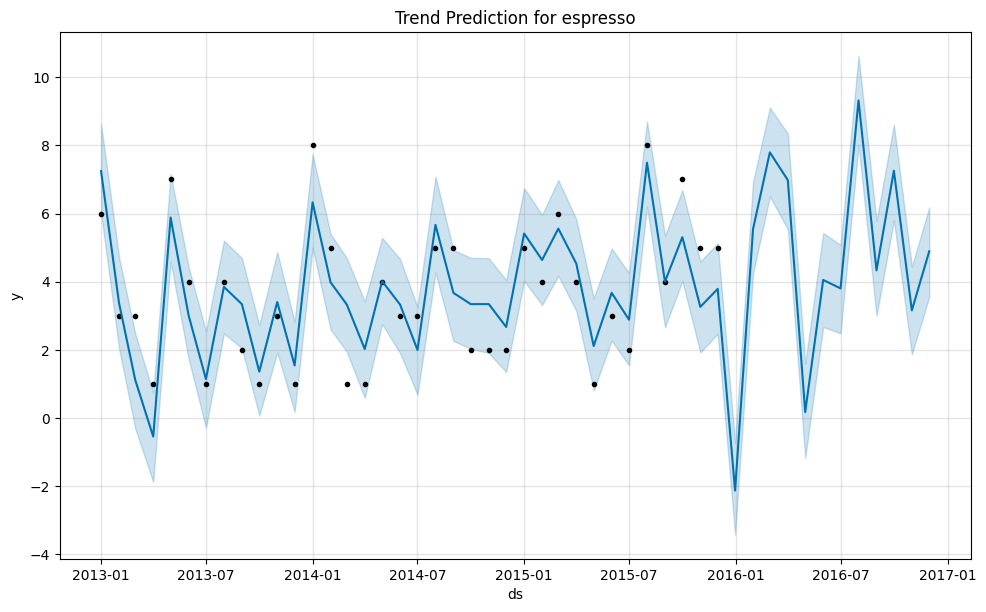

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/cml6gx6r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/6ih39cz_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=873', 'data', 'file=/tmp/tmp5dsp0rk3/cml6gx6r.json', 'init=/tmp/tmp5dsp0rk3/6ih39cz_.json', 'output', 'file=/tmp/tmp5dsp0rk3/prophet_modelzcf0x79j/prophet_model-20250306002110.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/p

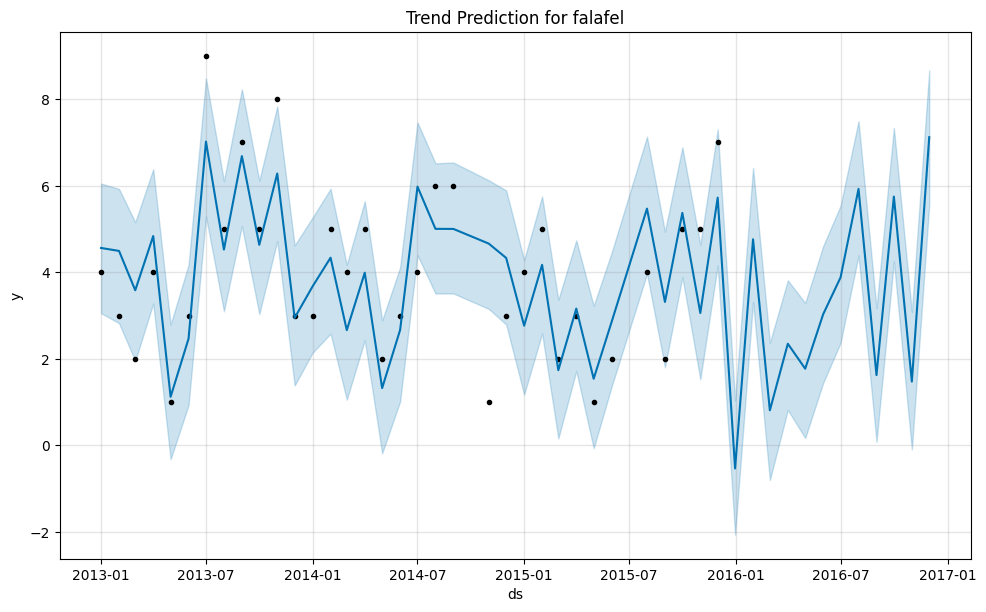

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/ozlzkcno.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/ztj92zrd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11670', 'data', 'file=/tmp/tmp5dsp0rk3/ozlzkcno.json', 'init=/tmp/tmp5dsp0rk3/ztj92zrd.json', 'output', 'file=/tmp/tmp5dsp0rk3/prophet_model_z_phd55/prophet_model-20250306002111.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

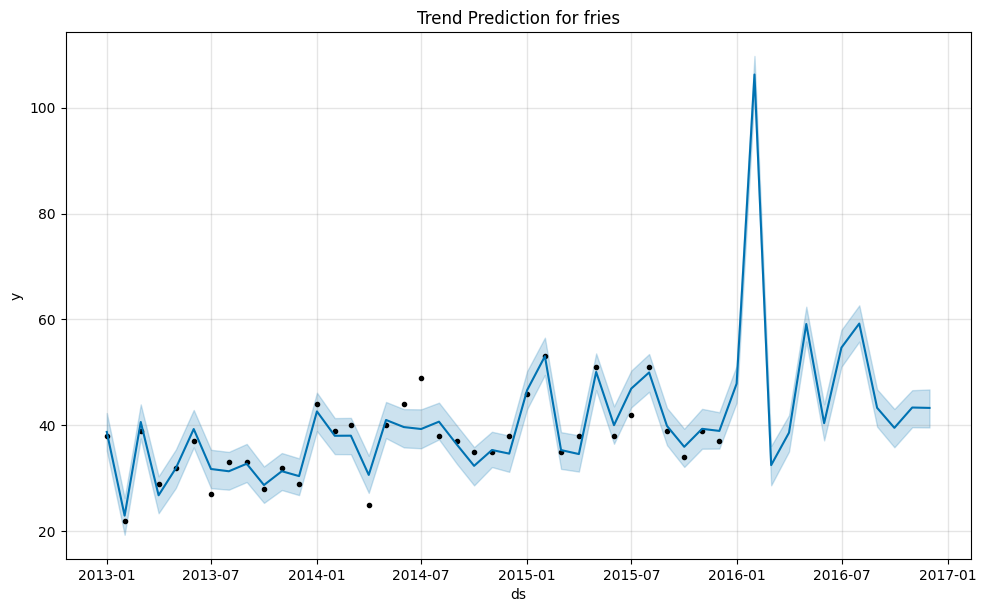

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/47llmhz4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/t1s95wnd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65304', 'data', 'file=/tmp/tmp5dsp0rk3/47llmhz4.json', 'init=/tmp/tmp5dsp0rk3/t1s95wnd.json', 'output', 'file=/tmp/tmp5dsp0rk3/prophet_modelwmhgsf1e/prophet_model-20250306002111.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

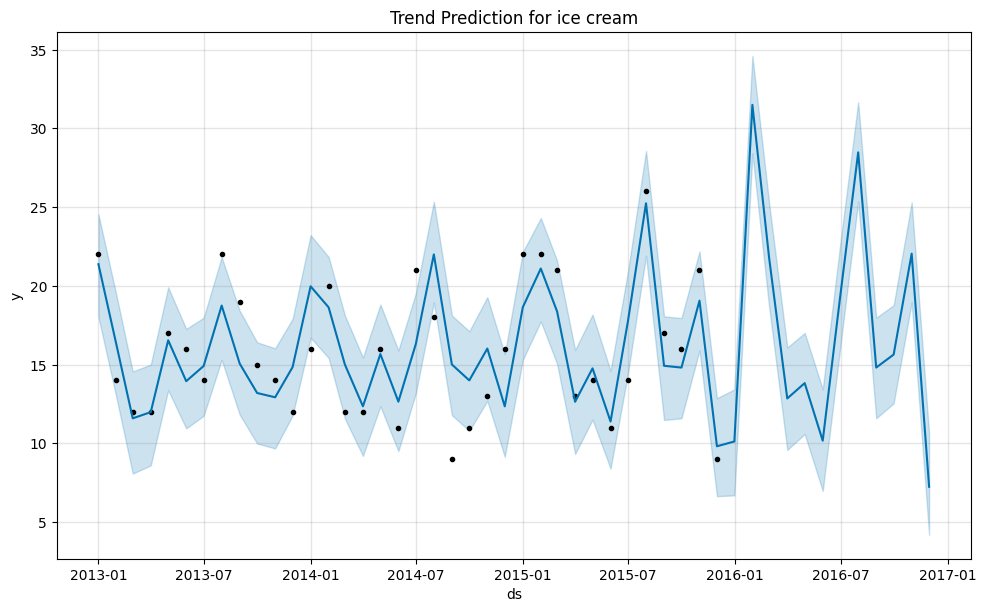

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/q3cnikx8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/e90jfer7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74200', 'data', 'file=/tmp/tmp5dsp0rk3/q3cnikx8.json', 'init=/tmp/tmp5dsp0rk3/e90jfer7.json', 'output', 'file=/tmp/tmp5dsp0rk3/prophet_modelsq5am03b/prophet_model-20250306002112.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

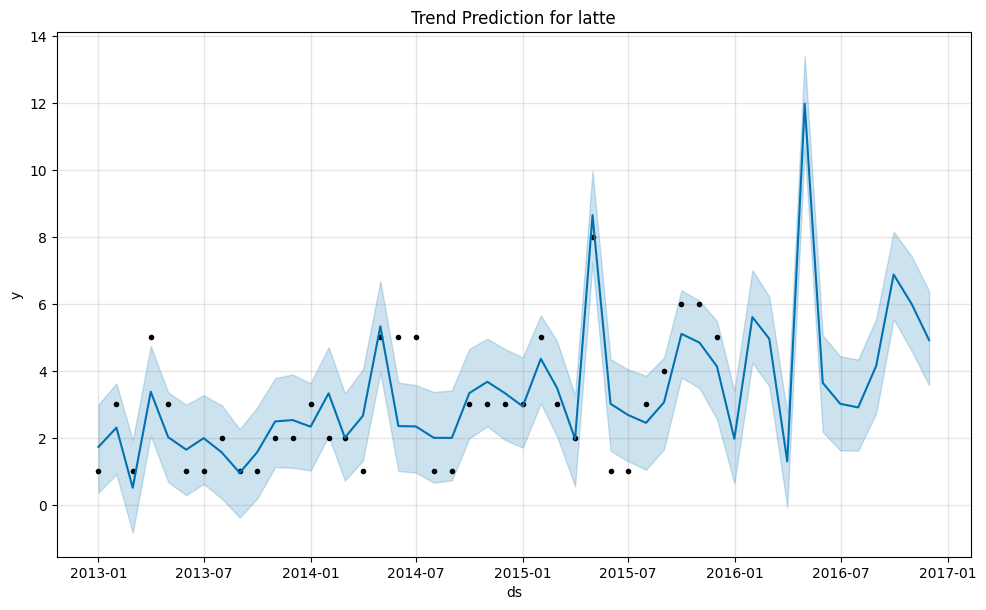

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/wavlrhy8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/5hcvlkxp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88022', 'data', 'file=/tmp/tmp5dsp0rk3/wavlrhy8.json', 'init=/tmp/tmp5dsp0rk3/5hcvlkxp.json', 'output', 'file=/tmp/tmp5dsp0rk3/prophet_modelo7y5nujy/prophet_model-20250306002113.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

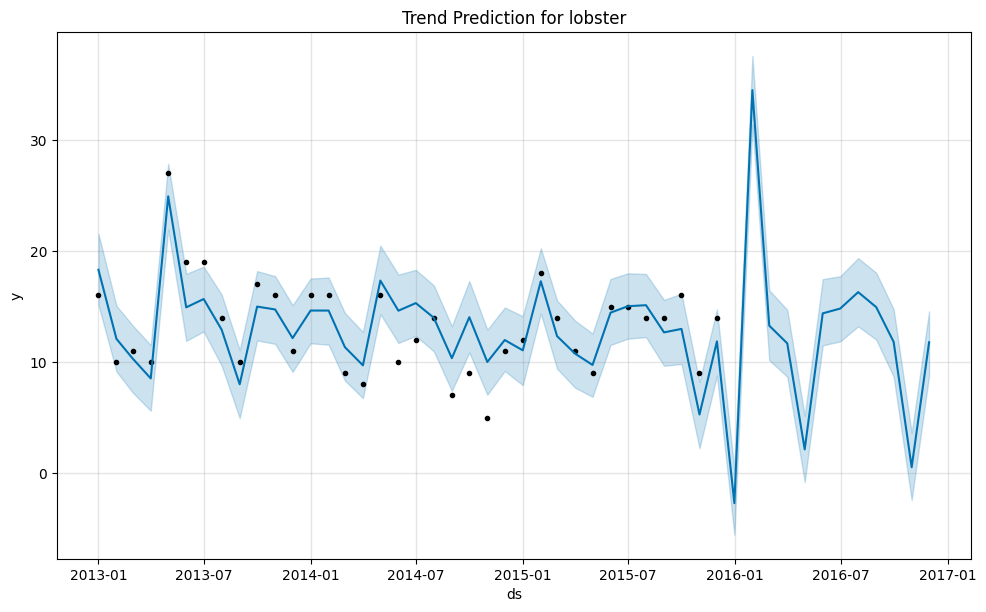

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/21kza8z6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/58ohw5o7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67346', 'data', 'file=/tmp/tmp5dsp0rk3/21kza8z6.json', 'init=/tmp/tmp5dsp0rk3/58ohw5o7.json', 'output', 'file=/tmp/tmp5dsp0rk3/prophet_modelbg62a1wi/prophet_model-20250306002113.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

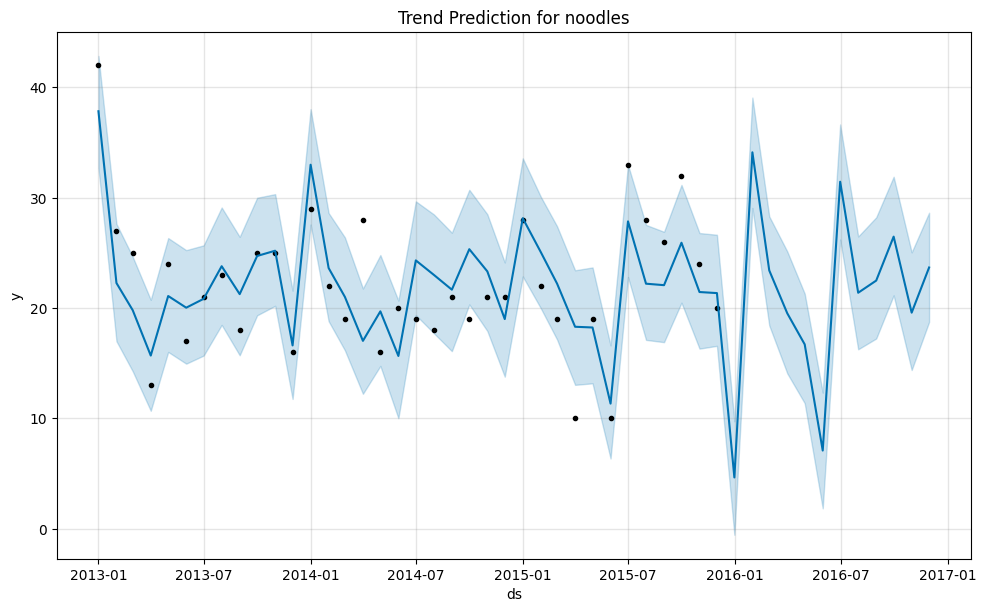

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/g10y2zy3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/o2_q74c5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18040', 'data', 'file=/tmp/tmp5dsp0rk3/g10y2zy3.json', 'init=/tmp/tmp5dsp0rk3/o2_q74c5.json', 'output', 'file=/tmp/tmp5dsp0rk3/prophet_model7zfg52in/prophet_model-20250306002114.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

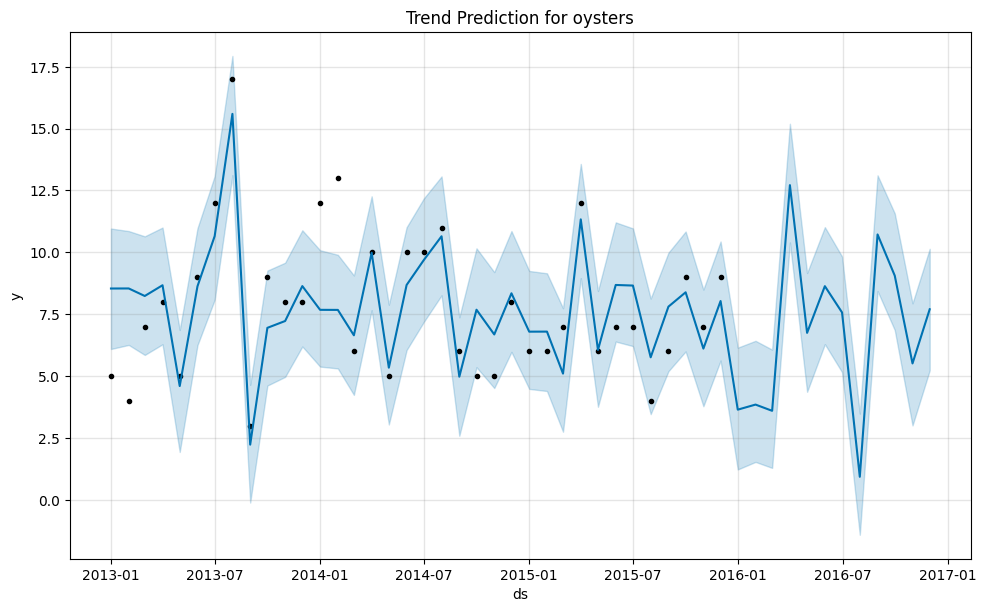

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/mo0tw5l6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/n2ql3i6t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48204', 'data', 'file=/tmp/tmp5dsp0rk3/mo0tw5l6.json', 'init=/tmp/tmp5dsp0rk3/n2ql3i6t.json', 'output', 'file=/tmp/tmp5dsp0rk3/prophet_model9fs9naig/prophet_model-20250306002115.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

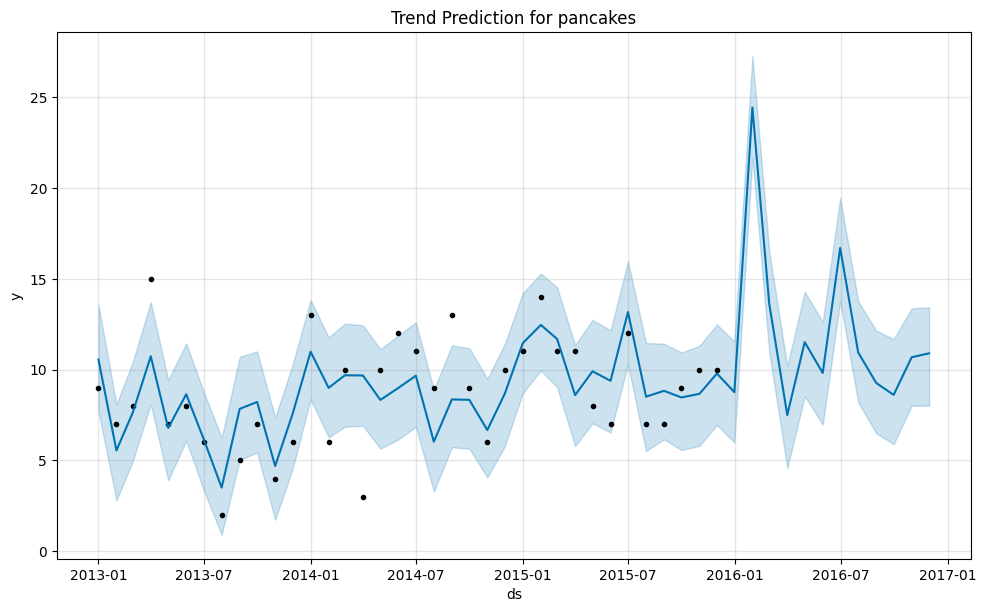

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/yg1zghq5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/pcxn8bhz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16467', 'data', 'file=/tmp/tmp5dsp0rk3/yg1zghq5.json', 'init=/tmp/tmp5dsp0rk3/pcxn8bhz.json', 'output', 'file=/tmp/tmp5dsp0rk3/prophet_modelgvctj1__/prophet_model-20250306002115.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

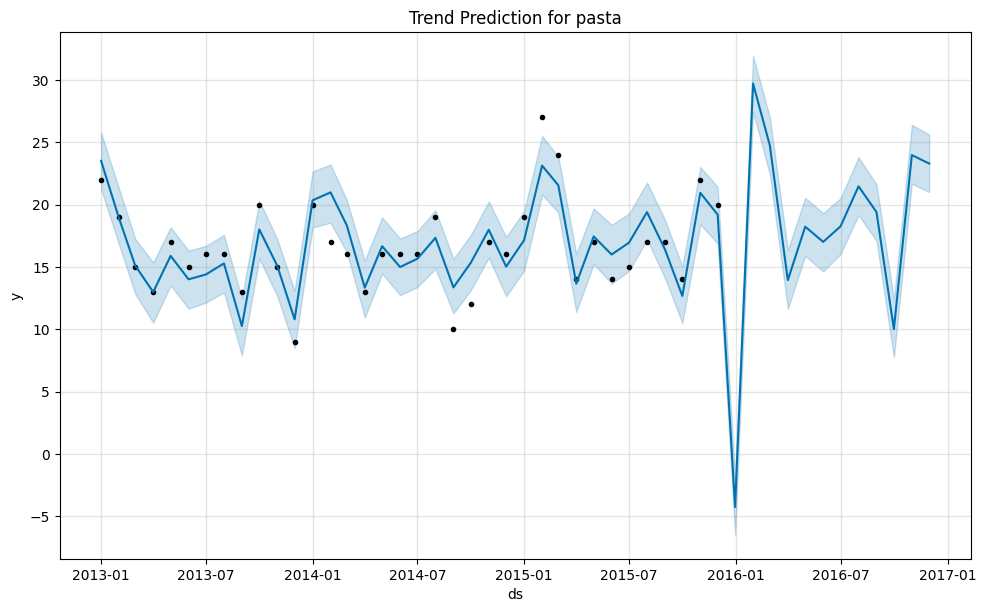

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/s6d1e1mz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/511trs30.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75781', 'data', 'file=/tmp/tmp5dsp0rk3/s6d1e1mz.json', 'init=/tmp/tmp5dsp0rk3/511trs30.json', 'output', 'file=/tmp/tmp5dsp0rk3/prophet_modelzwrvx6hn/prophet_model-20250306002116.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

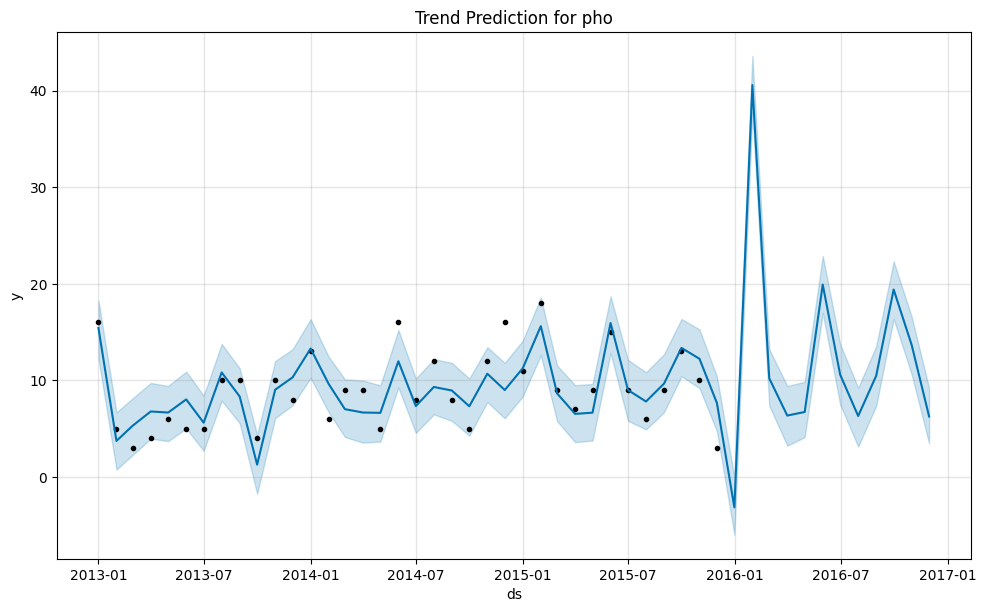

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/equbog1d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/dz_8laop.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65572', 'data', 'file=/tmp/tmp5dsp0rk3/equbog1d.json', 'init=/tmp/tmp5dsp0rk3/dz_8laop.json', 'output', 'file=/tmp/tmp5dsp0rk3/prophet_modelt612e9x0/prophet_model-20250306002116.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

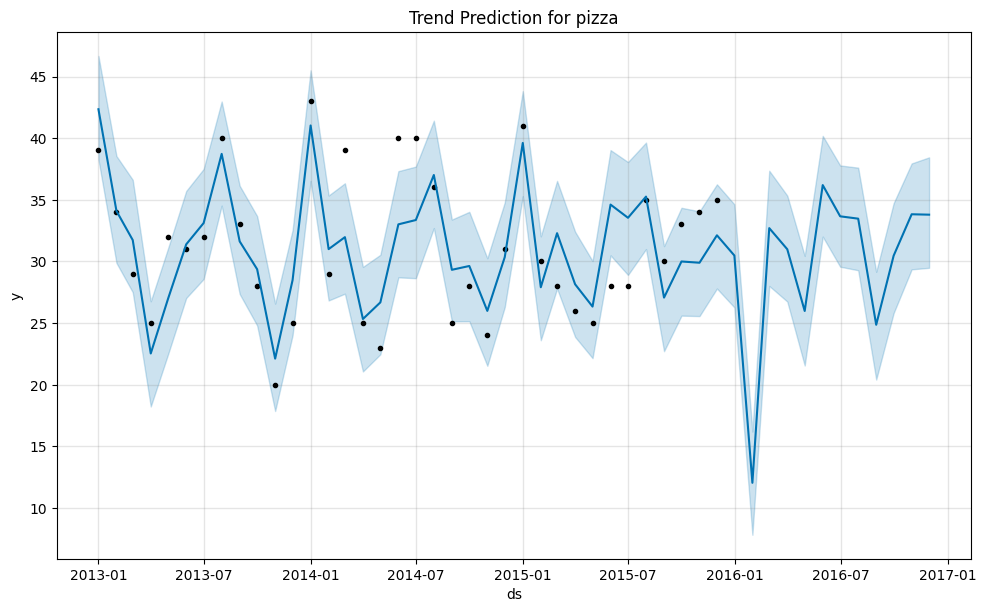

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/667b0vso.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/tlork653.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15466', 'data', 'file=/tmp/tmp5dsp0rk3/667b0vso.json', 'init=/tmp/tmp5dsp0rk3/tlork653.json', 'output', 'file=/tmp/tmp5dsp0rk3/prophet_modeluhzatw38/prophet_model-20250306002117.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

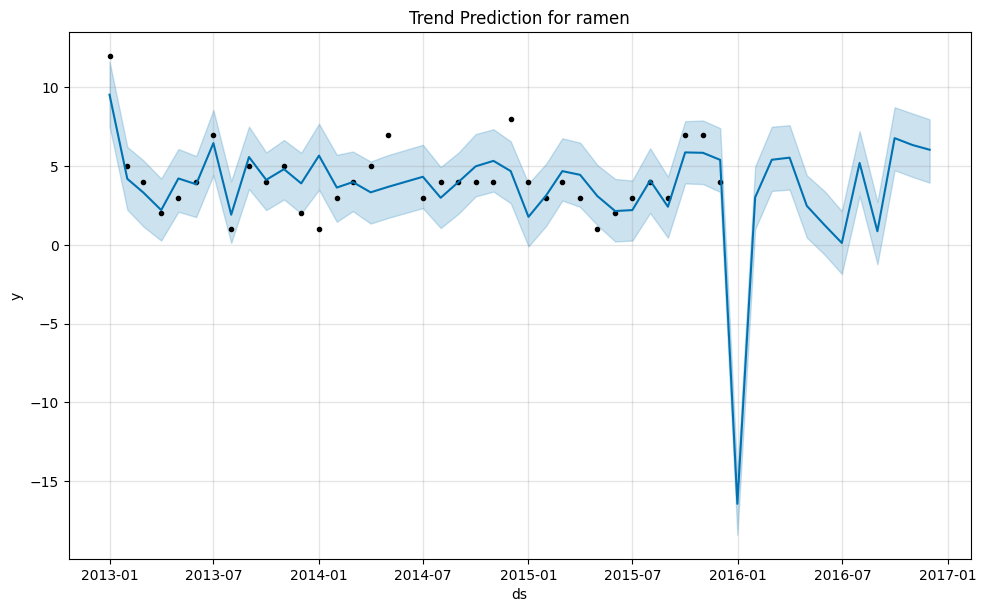

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/oeor916s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/6khm5hzp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91159', 'data', 'file=/tmp/tmp5dsp0rk3/oeor916s.json', 'init=/tmp/tmp5dsp0rk3/6khm5hzp.json', 'output', 'file=/tmp/tmp5dsp0rk3/prophet_modelhjqbfx_k/prophet_model-20250306002117.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

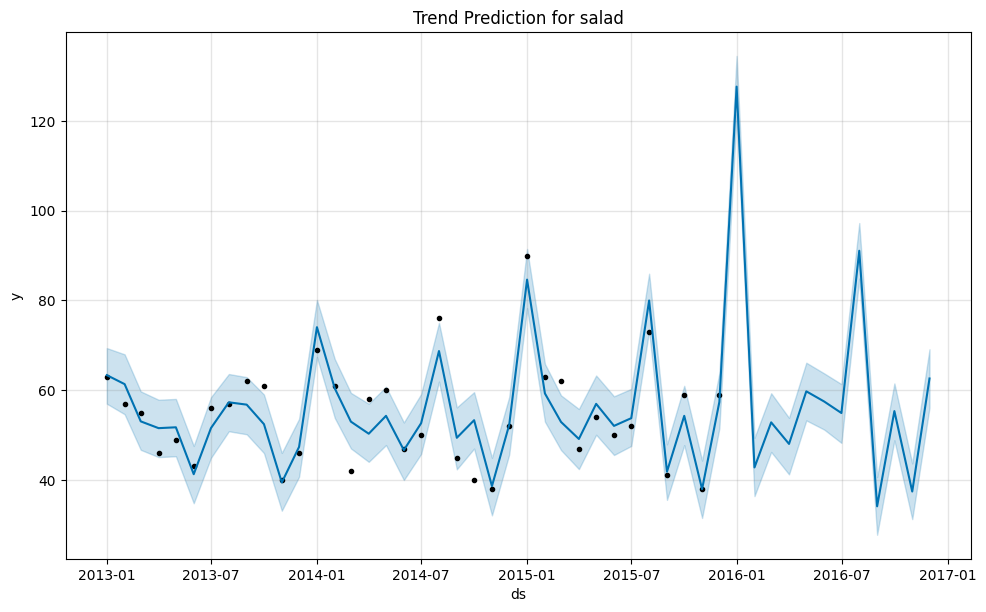

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/m1y2r82g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/vv1gzb0y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12902', 'data', 'file=/tmp/tmp5dsp0rk3/m1y2r82g.json', 'init=/tmp/tmp5dsp0rk3/vv1gzb0y.json', 'output', 'file=/tmp/tmp5dsp0rk3/prophet_modelld0z2llm/prophet_model-20250306002118.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

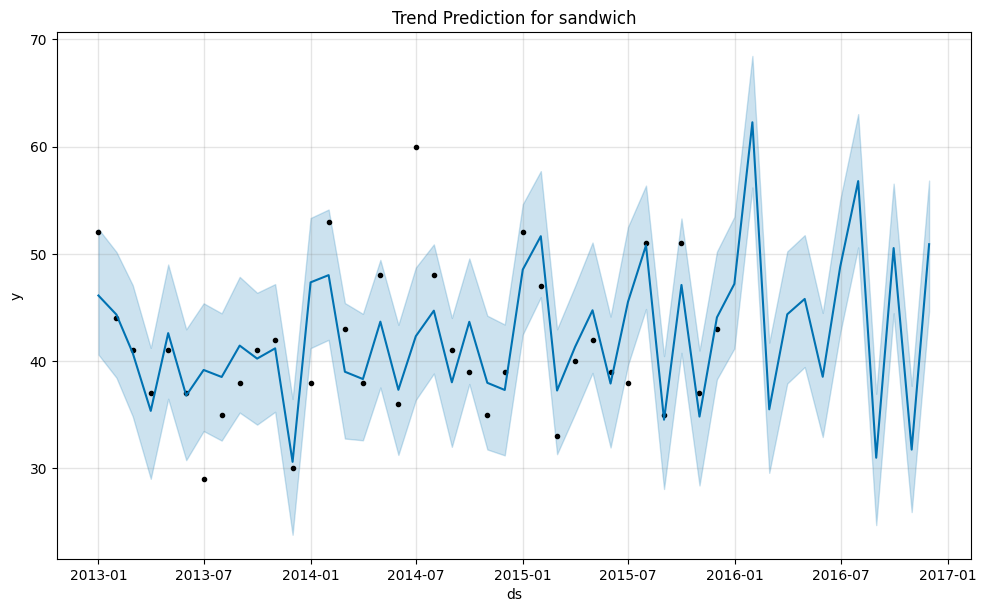

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/d70uunqk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/ck2qqvga.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66742', 'data', 'file=/tmp/tmp5dsp0rk3/d70uunqk.json', 'init=/tmp/tmp5dsp0rk3/ck2qqvga.json', 'output', 'file=/tmp/tmp5dsp0rk3/prophet_modelugl61vb6/prophet_model-20250306002118.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

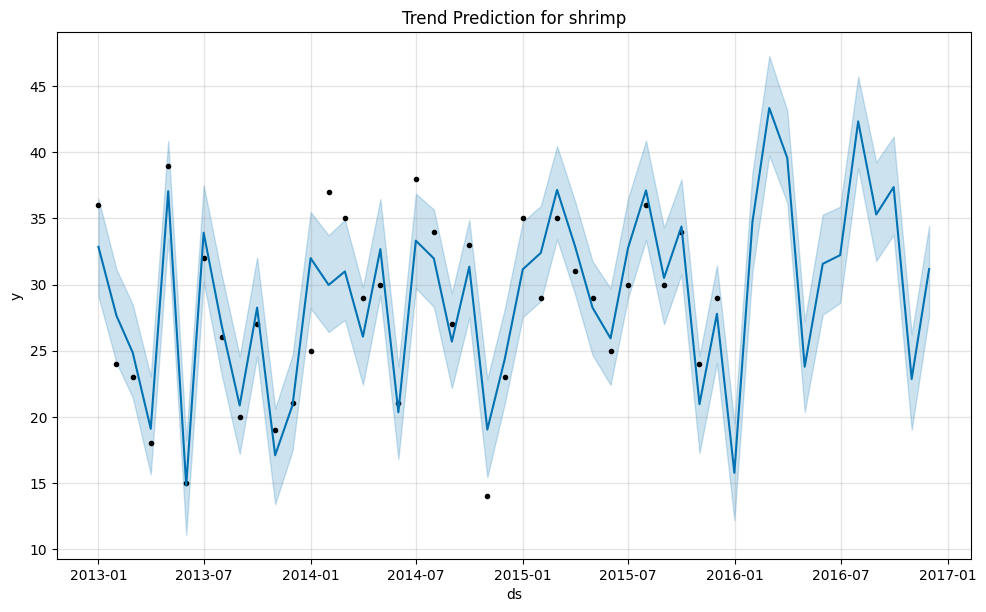

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/uuwjul3e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/oymgahv7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9312', 'data', 'file=/tmp/tmp5dsp0rk3/uuwjul3e.json', 'init=/tmp/tmp5dsp0rk3/oymgahv7.json', 'output', 'file=/tmp/tmp5dsp0rk3/prophet_modelmfars7hw/prophet_model-20250306002119.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/

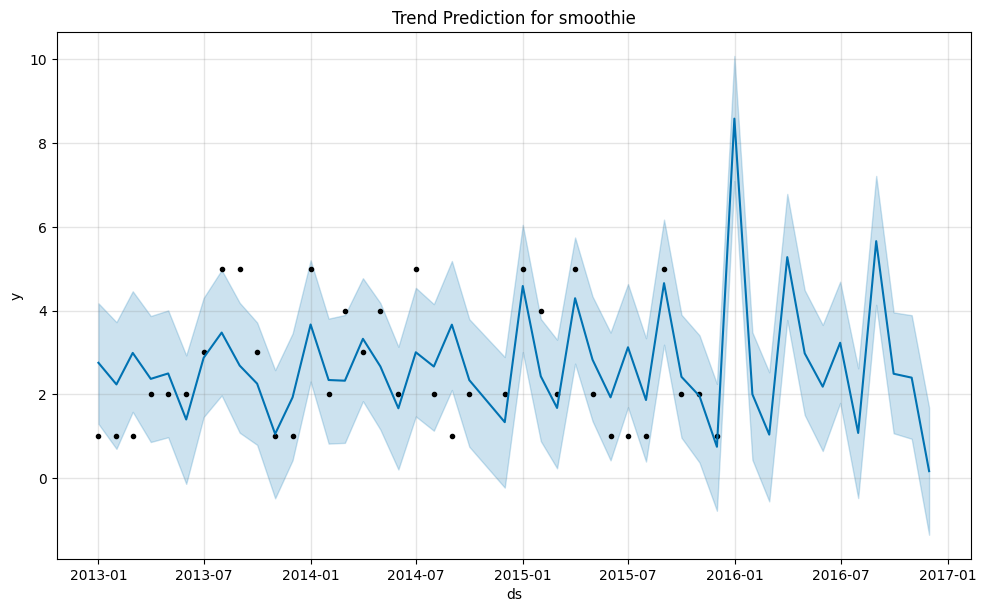

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/udw1yhbi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/4gqq4tm2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91865', 'data', 'file=/tmp/tmp5dsp0rk3/udw1yhbi.json', 'init=/tmp/tmp5dsp0rk3/4gqq4tm2.json', 'output', 'file=/tmp/tmp5dsp0rk3/prophet_modeli0v_m1py/prophet_model-20250306002120.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

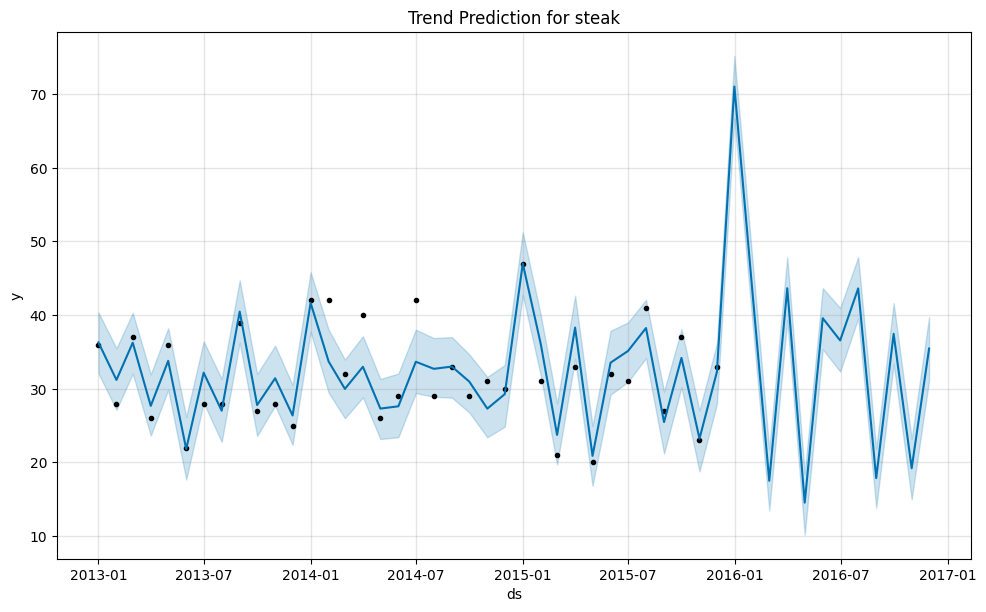

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/yfc56bz9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/gy7tgvry.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85048', 'data', 'file=/tmp/tmp5dsp0rk3/yfc56bz9.json', 'init=/tmp/tmp5dsp0rk3/gy7tgvry.json', 'output', 'file=/tmp/tmp5dsp0rk3/prophet_modeluaycw2s7/prophet_model-20250306002120.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

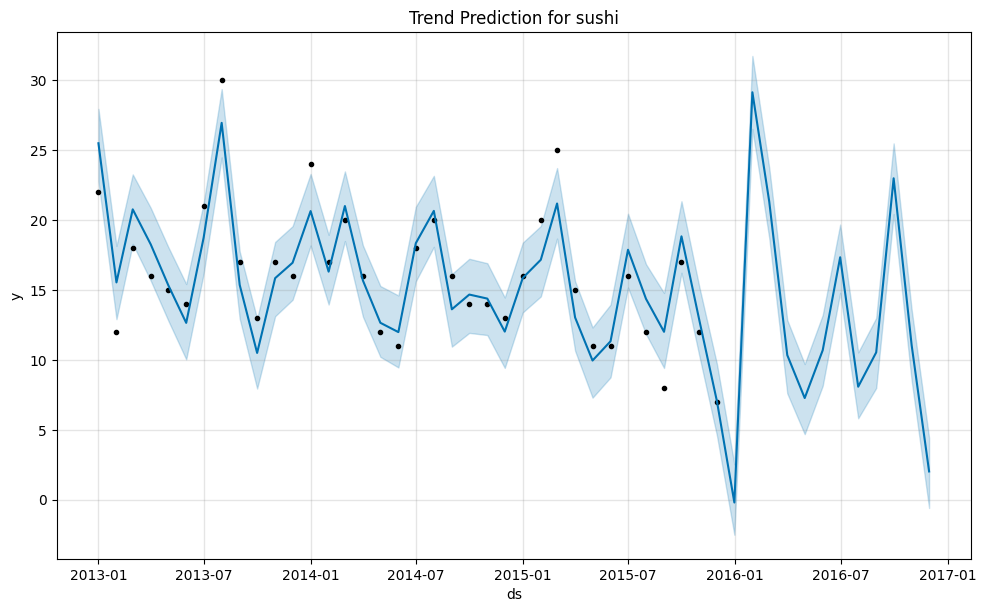

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/_vx7ut3x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/4wf9xu9n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83061', 'data', 'file=/tmp/tmp5dsp0rk3/_vx7ut3x.json', 'init=/tmp/tmp5dsp0rk3/4wf9xu9n.json', 'output', 'file=/tmp/tmp5dsp0rk3/prophet_modeldwx53agk/prophet_model-20250306002121.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

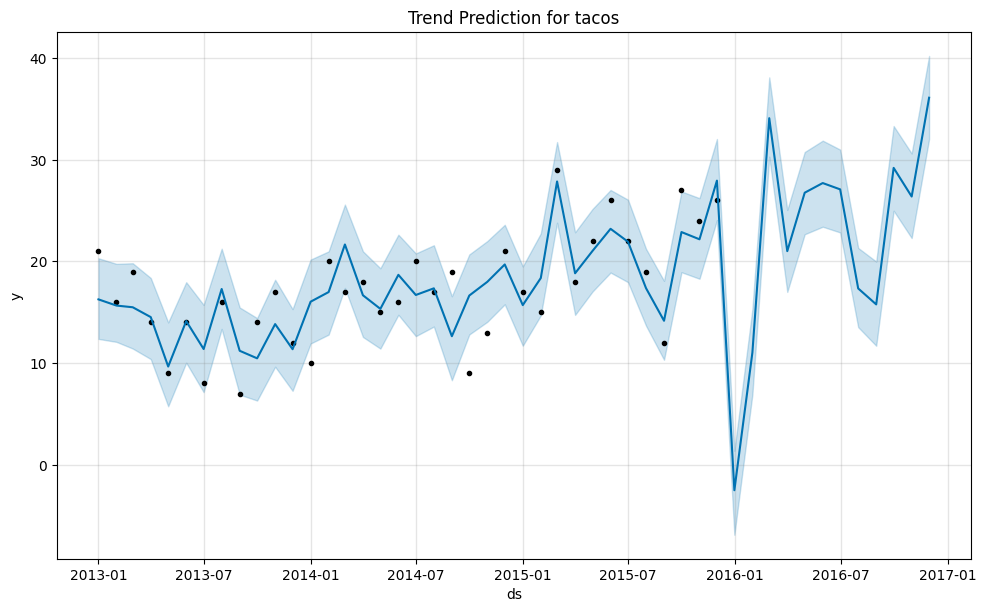

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/nep54wqt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/5nuvo56w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38848', 'data', 'file=/tmp/tmp5dsp0rk3/nep54wqt.json', 'init=/tmp/tmp5dsp0rk3/5nuvo56w.json', 'output', 'file=/tmp/tmp5dsp0rk3/prophet_model1r_3nqyc/prophet_model-20250306002122.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

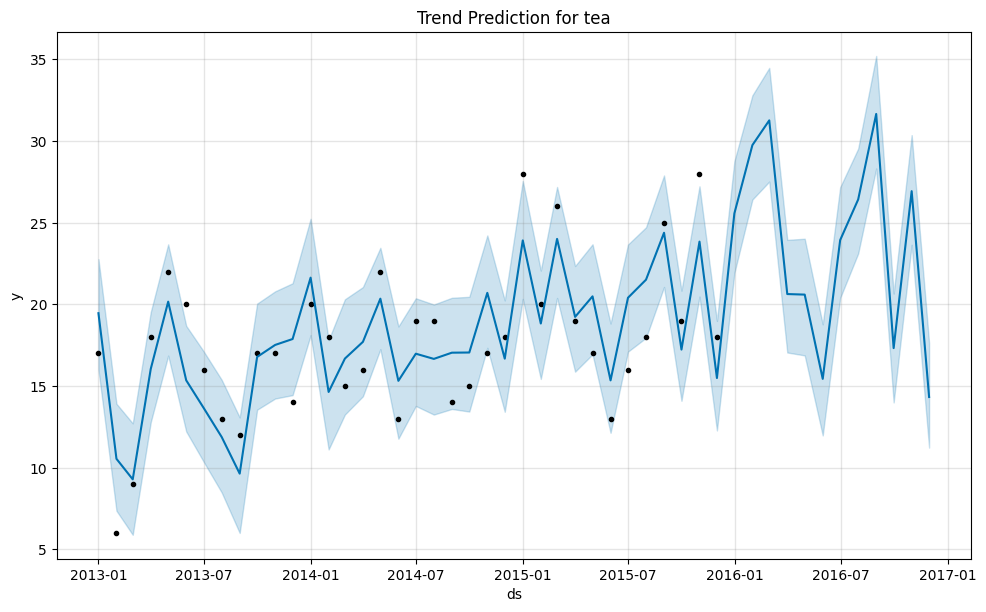

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/0snvqsf7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/zwveg07f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74297', 'data', 'file=/tmp/tmp5dsp0rk3/0snvqsf7.json', 'init=/tmp/tmp5dsp0rk3/zwveg07f.json', 'output', 'file=/tmp/tmp5dsp0rk3/prophet_model54l29kyp/prophet_model-20250306002123.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

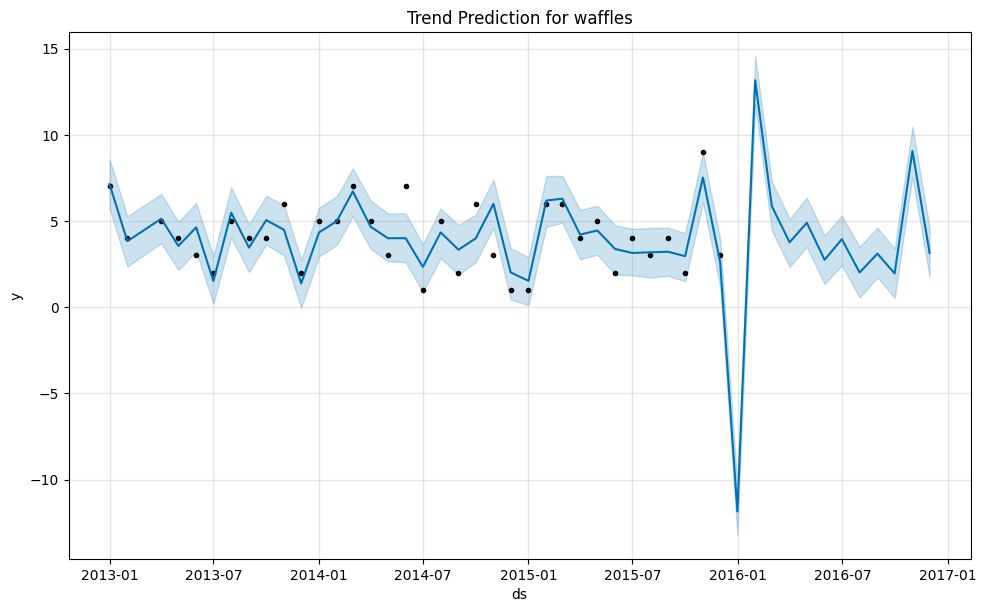

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/yhq8b9vr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/028_6qf2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6170', 'data', 'file=/tmp/tmp5dsp0rk3/yhq8b9vr.json', 'init=/tmp/tmp5dsp0rk3/028_6qf2.json', 'output', 'file=/tmp/tmp5dsp0rk3/prophet_model4yaqwcy0/prophet_model-20250306002123.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

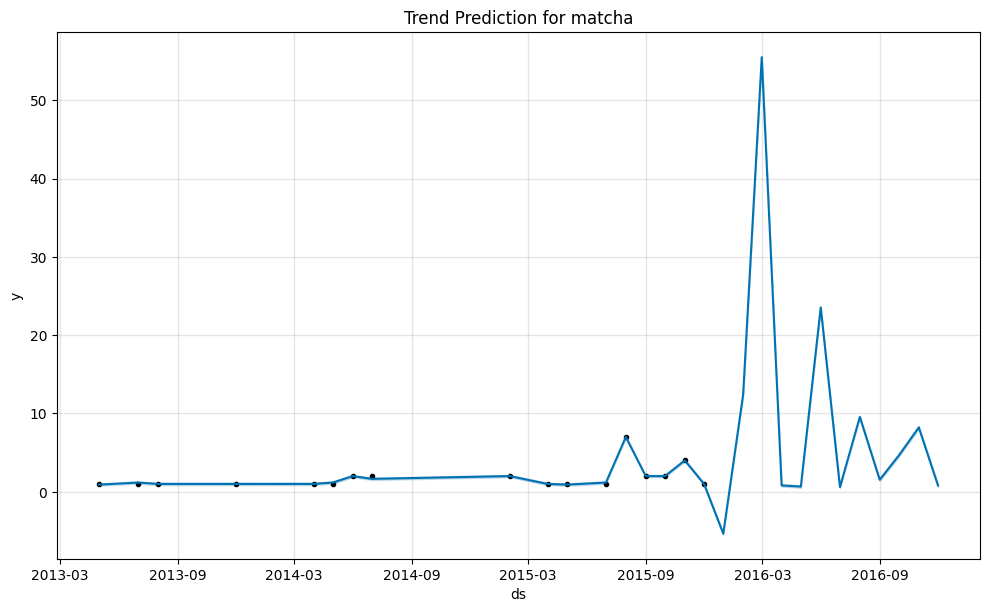

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/2sityk1z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5dsp0rk3/yaicvlf1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98995', 'data', 'file=/tmp/tmp5dsp0rk3/2sityk1z.json', 'init=/tmp/tmp5dsp0rk3/yaicvlf1.json', 'output', 'file=/tmp/tmp5dsp0rk3/prophet_model878hykgw/prophet_model-20250306002124.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:21:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

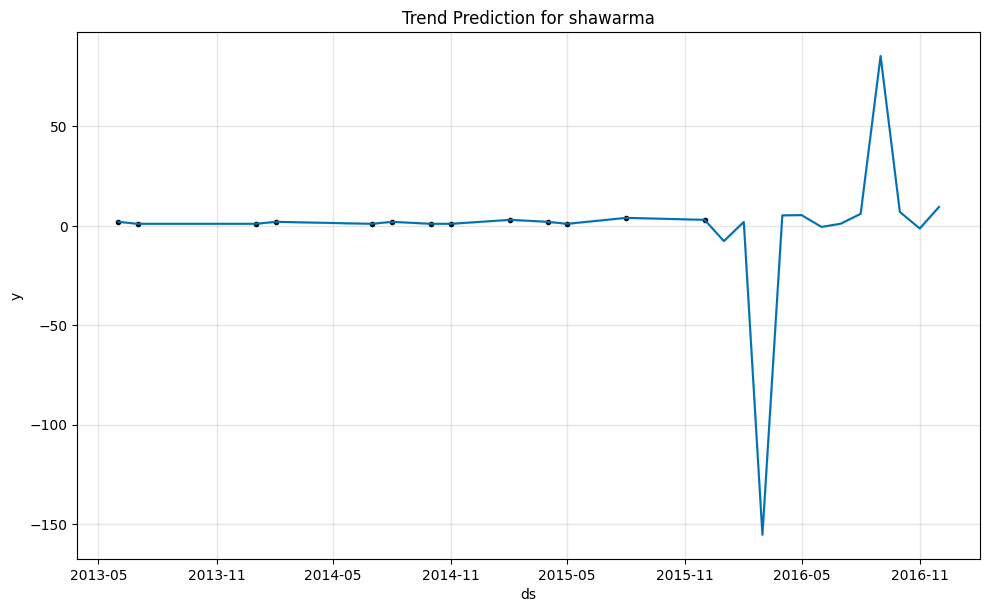

In [6]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Store predictions for each food trend
predictions = {}

for food in train["food_mentions"].unique():
    food_train = train[train["food_mentions"] == food][["date", "count"]].rename(columns={"date": "ds", "count": "y"})

    if len(food_train) < 10:  # Skip trends with too little data
        continue

    # Train Prophet model
    model = Prophet(yearly_seasonality=True)
    model.fit(food_train)

    # Create future dataframe for 2016 predictions
    future = model.make_future_dataframe(periods=12, freq="M")
    forecast = model.predict(future)

    # Store results
    predictions[food] = forecast[["ds", "yhat"]]

    # Plot results
    model.plot(forecast)
    plt.title(f"Trend Prediction for {food}")
    plt.show()

In [7]:
from sklearn.metrics import mean_absolute_error

# Evaluate predictions
mae_scores = {}

for food, forecast in predictions.items():
    actual = test[test["food_mentions"] == food][["date", "count"]].rename(columns={"date": "ds", "count": "y"})

    # Merge predicted and actual
    merged = forecast.merge(actual, on="ds", how="left").fillna(0)

    # Calculate MAE
    mae_scores[food] = mean_absolute_error(merged["y"], merged["yhat"])

# Sort by best-performing models
mae_df = pd.DataFrame(mae_scores.items(), columns=["Food Item", "MAE"]).sort_values(by="MAE")

print("Top Performing Predictions:")
print(mae_df.head(10))

Top Performing Predictions:
   Food Item       MAE
26  smoothie  2.703769
14     latte  3.360423
11   falafel  3.804190
10  espresso  3.990232
22     ramen  4.372028
31   waffles  4.477824
32    matcha  5.333015
2    burrito  7.355823
17   oysters  7.554863
18  pancakes  9.494297
